<a href="https://colab.research.google.com/github/summerolmstead/Airport-Flights-Network/blob/main/Airport_Flight_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install pyvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.2 MB/s eta 0:00:00


In [4]:
import pandas as pd

#defining column names based on OpenFlights' routes.dat format
columns = ['airline', 'airline_id', 'source_airport', 'source_airport_id',
           'destination_airport', 'destination_airport_id', 'codeshare',
           'stops', 'equipment']

#loading the routes data directly from OpenFlights GitHub repo
url = 'https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat'
routes_df = pd.read_csv(url, names=columns, usecols=['source_airport', 'destination_airport'])

#df head to see data
routes_df.head()

,source_airport,destination_airport
0,AER,KZN
1,ASF,KZN
2,ASF,MRV
3,CEK,KZN
4,CEK,OVB


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('source_airport').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('destination_airport').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['destination_airport'].value_counts()
    for x_label, grp in _df_2.groupby('source_airport')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('source_airport')
_ = plt.ylabel('destination_airport')

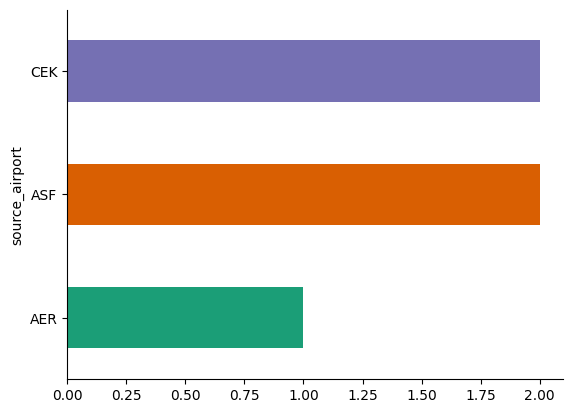

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('source_airport').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [5]:
#list of major U.S. airport IATA codes
major_us_airports = ['ATL', 'LAX', 'ORD', 'DFW', 'JFK', 'DEN', 'SFO', 'SEA', 'LAS', 'MCO']

#filter routes where both source and destination airports are in the list of major U.S. airports
filtered_routes = routes_df[
    (routes_df['source_airport'].isin(major_us_airports)) &
    (routes_df['destination_airport'].isin(major_us_airports))
]

#display the filtered routes to see simplified version
filtered_routes.head()


,source_airport,destination_airport
996,LAS,LAX
997,LAX,LAS
4699,ATL,DFW
4702,ATL,ORD
5152,DEN,DFW


In [8]:
from pyvis.network import Network
from google.colab import files

#Pyvis network
net = Network(notebook=False, height="750px", width="100%", bgcolor="#222222", font_color="white")
#add nodes (airports)
for airport in major_us_airports:
    net.add_node(airport, label=airport)
#add edges (routes/flights)
for index, row in filtered_routes.iterrows():
    net.add_edge(row['source_airport'], row['destination_airport'])
#save the network as an HTML file
file_name = "flight_routes.html"
net.save_graph(file_name)
#download the file to save interactive network visualization!
files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
from collections import Counter
#lets make it thicker lines for more frequent routes -

#count occurrences of each route (treating routes as undirected for simplicity)
route_counts = Counter(tuple(sorted([row['source_airport'], row['destination_airport']])) for _, row in filtered_routes.iterrows())
#df
route_df = pd.DataFrame(route_counts.items(), columns=['route', 'frequency'])
#split route tuple into two columns
route_df[['source', 'destination']] = pd.DataFrame(route_df['route'].tolist(), index=route_df.index)
#drop the tuple column
route_df.drop(columns=['route'], inplace=True)
#top routes by frequency
route_df.sort_values(by='frequency', ascending=False).head()


,frequency,source,destination
2,39,ATL,ORD
30,22,ATL,DEN
1,21,ATL,DFW
36,20,ATL,SFO
33,19,ATL,LAX


In [10]:
from pyvis.network import Network
from google.colab import files

#initialize Pyvis network
net = Network(notebook=False, height="750px", width="100%", bgcolor="#222222", font_color="white")

#add nodes (airports)
for airport in major_us_airports:
    net.add_node(airport, label=airport)

#add edges (routes) with weight
for index, row in route_df.iterrows():
    weight = row['frequency'] / max(route_df['frequency']) * 10  #normalize thickness (0-10)
    net.add_edge(row['source'], row['destination'], width=weight)

file_name = "flight_routes_weighted.html" #same steps
net.save_graph(file_name)
files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>